## Import Libraries and load Dataset:-

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data Preprocessing & Data Cleaning:-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.size,df.shape

(5684540, (568454, 10))

In [5]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]

Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
ProfileName               0.000046
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Summary                   0.000047
Text                      0.000000
dtype: float64

## Above we see that Summary and ProfileName column have null value but 
## ProfileName & Summary feature is not import for Sentiment Analaysis Text so further 
## we will remove ProfileName and Summary Columns:-

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df['HelpfulnessNumerator'].value_counts()

HelpfulnessNumerator
0      303826
1      116467
2       53727
3       29007
4       16963
        ...  
446         1
155         1
580         1
355         1
808         1
Name: count, Length: 231, dtype: int64

In [9]:
df['HelpfulnessDenominator'].value_counts()

HelpfulnessDenominator
0      270052
1      112753
2       61482
3       34394
4       22306
        ...  
197         1
488         1
383         1
219         1
815         1
Name: count, Length: 234, dtype: int64

In [10]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [11]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01.303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01.346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01.219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1970-01-01 00:00:01.307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1970-01-01 00:00:01.350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
new_df = df.iloc[:200001,:]
new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01.303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01.346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01.219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1970-01-01 00:00:01.307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1970-01-01 00:00:01.350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
new_df.shape

(200001, 10)

(array([ 18297.,      0.,  10575.,      0.,      0.,  15624.,      0.,
         29118.,      0., 126387.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

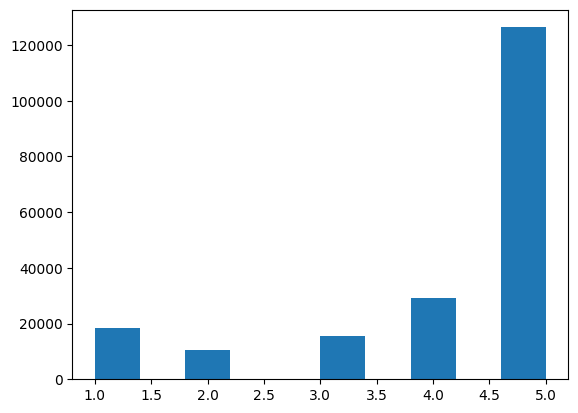

In [15]:
plt.hist(new_df['Score'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20592\2965354566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Score'])


<Axes: xlabel='Score', ylabel='Density'>

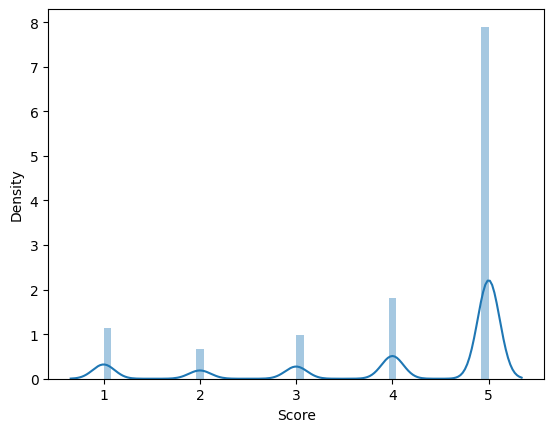

In [16]:
sns.distplot(new_df['Score'])

<Axes: ylabel='Score'>

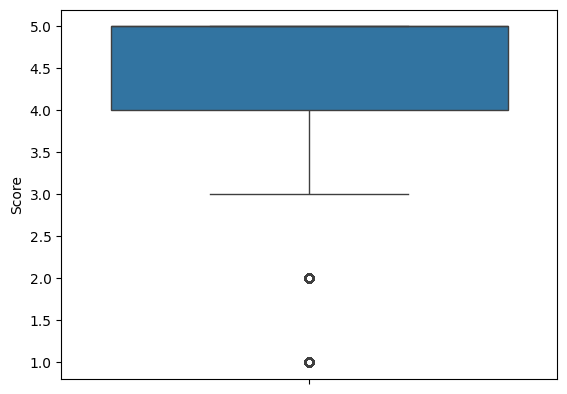

In [17]:
sns.boxplot(new_df['Score']) 

## if we do remove this kind of outlier of value 1 and 2 then model can't capable for predictions new review which have score 1 or 2
## so ignoure its:- 

## Feature Engineering & Feature Selections:- 

In [18]:
new_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [19]:
remove_col = ['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary']
new_df.drop(remove_col,axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20592\1735936037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(remove_col,axis=1,inplace=True)


In [20]:
new_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [21]:
new_df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [22]:
new_df.isnull().sum()

Score    0
Text     0
dtype: int64

In [23]:
# !pip install textblob

## Import NLP 

In [24]:
# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob 
import nltk

In [25]:
# Function to handle lowercase conversion safely 
def to_lower(x): 
    if isinstance(x, str): 
        return x.lower() 
    return x

In [26]:
# nltk.download('punkt') 
# nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

In [27]:
# !pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.6/12.8 MB 9.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 8.7 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 9.5 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 10.4 MB/s eta 0:00:01
     ----------------------------------- --- 11.5/12.8 MB 11.3 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
import spacy 

In [29]:
nlp = spacy.load('en_core_web_sm')

In [30]:
token = nlp(new_df['Text'][0])

In [31]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

In [ ]:
# def clean_text(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize
#     tokens = word_tokenize(text)
#     # Remove stopwords and non-alphabetic characters
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
#     return ' '.join(tokens)

# # Apply cleaning
# df['cleaned_text'] = df['text'].apply(clean_text)

In [32]:
# Preprocess the text data
def preprocess(text):
    if not isinstance(text, str): 
        return ''
    # Tokenization
    tokens = nltk.word_tokenize(text)
    #tokens = tokens.str.replace('[^\w\s]','')
    # Remove stop words
    # stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = nltk.PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [33]:
new_df['Score'].value_counts().sum()

200001

In [34]:
new_df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [35]:
preprocess(new_df['Text'][0])

'i bought sever vital can dog food product found good qualiti . the product look like stew process meat smell better . my labrador finicki appreci product better .'

In [36]:
new_df['Text'] = new_df['Text'].apply(preprocess)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20592\268850601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(preprocess)


In [37]:
new_df.head()

,Score,Text
0,5,i bought sever vital can dog food product foun...
1,1,product arriv label jumbo salt peanut ... pean...
2,4,"thi confect around centuri . it light , pillow..."
3,2,if look secret ingredi robitussin i believ i f...
4,5,great taffi great price . there wide assort yu...


In [38]:
new_df['Review'] = new_df['Score'].apply( lambda x:'Positive' if x >=4 else ('Negative' if x<2 else 'Neutral' ))

C:\Users\DELL\AppData\Local\Temp\ipykernel_20592\3183310556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Review'] = new_df['Score'].apply( lambda x:'Positive' if x >=4 else ('Negative' if x<2 else 'Neutral' ))


In [39]:
new_df['Review'] = new_df['Review'].map({'Positive':0,'Neutral':1,'Negative':2})

C:\Users\DELL\AppData\Local\Temp\ipykernel_20592\1171442549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Review'] = new_df['Review'].map({'Positive':0,'Neutral':1,'Negative':2})


In [40]:
new_df.head()

,Score,Text,Review
0,5,i bought sever vital can dog food product foun...,0
1,1,product arriv label jumbo salt peanut ... pean...,2
2,4,"thi confect around centuri . it light , pillow...",0
3,2,if look secret ingredi robitussin i believ i f...,1
4,5,great taffi great price . there wide assort yu...,0


In [41]:
new_df.shape

(200001, 3)

## Machine learning Libraries for further processing:-

In [42]:
# For Splitting the dataset
from sklearn.model_selection import train_test_split

#Accuracy measuring library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Vectorization technique TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn Pipeline
from sklearn.pipeline import Pipeline

## Divided the dataset into X and Y -> Text is X independent and y is dependent

In [43]:
X = new_df['Text']
X.head()

0    i bought sever vital can dog food product foun...
1    product arriv label jumbo salt peanut ... pean...
2    thi confect around centuri . it light , pillow...
3    if look secret ingredi robitussin i believ i f...
4    great taffi great price . there wide assort yu...
Name: Text, dtype: object

In [44]:
y = new_df['Review']
y.head()

0    0
1    2
2    0
3    1
4    0
Name: Review, dtype: int64

## Split the data into training and testing sets, stratifying by label

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42) # stratify=y

In [46]:
X_train.shape , y_train.shape

((160000,), (160000,))

In [47]:
X_test.shape,y_test.shape

((40001,), (40001,))

In [48]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)

In [49]:
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [50]:
X_train_v

<160000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4529041 stored elements in Compressed Sparse Row format>

In [62]:
with open('vectorizer.pkl', 'wb') as model_file: 
    pickle.dump(vectorizer, model_file)

In [50]:
# model:- 
model = LogisticRegression()
model.fit(X_train_v,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

LogisticRegression()

In [51]:
# Evaluate the model
y_pred = model.predict(X_test_v)

In [52]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [53]:
# model.score(y_test,y_pred)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

0.8346791330216745

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     31025
           1       0.56      0.33      0.42      5277
           2       0.66      0.49      0.56      3699

    accuracy                           0.83     40001
   macro avg       0.70      0.59      0.63     40001
weighted avg       0.81      0.83      0.82     40001



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

<Axes: >

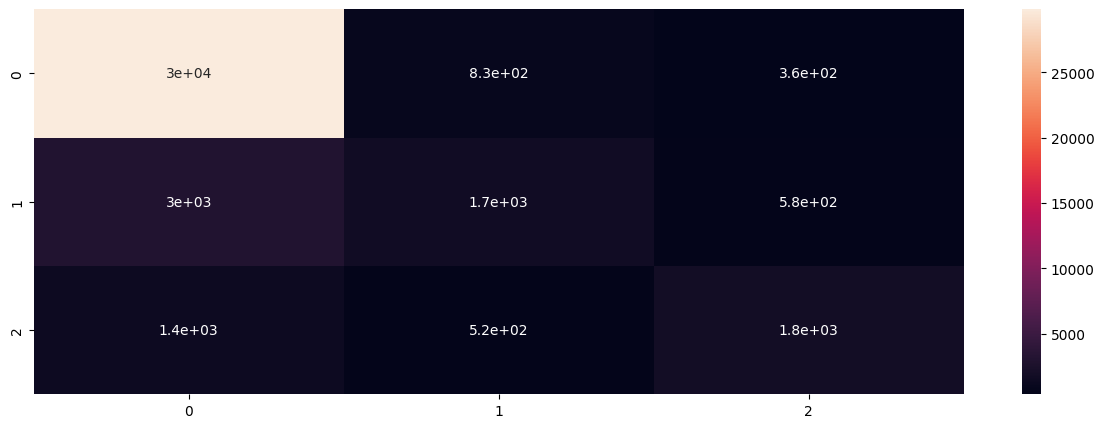

In [56]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [57]:
nb = MultinomialNB()

In [58]:
nb.fit(X_train_v,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MultinomialNB()

In [59]:
y_pred = nb.predict(X_test_v)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print("Accuracry Score:-",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracry Score:- 0.7833304167395815
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     31025
           1       0.60      0.00      0.01      5277
           2       0.81      0.08      0.15      3699

    accuracy                           0.78     40001
   macro avg       0.73      0.36      0.35     40001
weighted avg       0.76      0.78      0.70     40001



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [63]:
clf = Pipeline([
    ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
    ('RandomForestClassifier Classifier:', LogisticRegression())  # Second step: LogisticRegression
])

clf.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

Pipeline(steps=[('TF-IDF Vectorizer:', TfidfVectorizer()),
                ('RandomForestClassifier Classifier:', LogisticRegression())])

In [64]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
print("Accuracry Score:-",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracry Score:- 0.8539286517837054
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     31025
           1       0.61      0.38      0.47      5277
           2       0.73      0.57      0.64      3699

    accuracy                           0.85     40001
   macro avg       0.74      0.64      0.68     40001
weighted avg       0.84      0.85      0.84     40001



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [66]:
X_test

23281     i gf appreci any/al effort toward new food dul...
79160     each i 've open blend mash chunki bean make go...
188226    thi wonder stuff like nice strong full-bodi co...
194359    if like halvah , like i , enjoy individu wrap ...
41895     we 3 cat 2 eat almost treat , one picki . it a...
                                ...                        
29979     a wasten money time . we tri air pop -- 5 % po...
4174      i recent went gluten free one favorit mix . i ...
91539     thi typic tart candi sweet , plain sour , flav...
144267    i realli like spici tast . if 're use spici ta...
185595    these strang tast first , turn strang pleasant...
Name: Text, Length: 40001, dtype: object

In [67]:
import pickle

In [66]:
with open('model.pkl', 'wb') as model_file: 
    pickle.dump(model, model_file)

In [68]:
with open('pipeline.pkl', 'wb') as model_file: 
    pickle.dump(clf, model_file)